In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
Train_Data = pd.read_csv('Encoded_Train_Data.csv')
Val_Data = pd.read_csv('Encoded_Val_Data.csv') 
Test_Data = pd.read_csv('Encoded_Test_Data.csv') 

In [3]:
Train_Data.columns


Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Educational_Level',
       'Income', 'Expected_checkin', 'Expected_checkout', 'Booking_date',
       'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Days_plan_to_stay', 'checkin_year',
       'checkin_month', 'checkin_day', 'checkin_day_of_the_week',
       'Days_until_checkin', 'Booking_month', 'Booking_day_of_the_week',
       'Min_num_of_rooms', 'Total_Min_Cost', 'Min_Discount_amo

In [4]:
Continus = ['Age','Discount_Rate','Room_Rate','checkin_year','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms',
            'Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Min Value'] = list(Train_Data.min(axis=0))
    summary['Max Value'] = list(Train_Data.max(axis=0))
    return summary

resumetable(Train_Data)

Dataset Shape: (27499, 46)


,Name,dtypes,Missing,Uniques,Min Value,Max Value
0,Unnamed: 0,int64,0,27499,0,27498
1,Reservation-id,int64,0,27495,3154,99999005
2,Gender,int64,0,2,0,1
3,Age,int64,0,53,18,70
4,Educational_Level,int64,0,4,0,3
5,Income,int64,0,4,0,3
6,Expected_checkin,object,0,901,2014-11-18,2017-09-06
7,Expected_checkout,object,0,929,2014-11-22,2017-09-09
8,Booking_date,object,0,1133,2014-01-09,2017-08-30
9,Adults,int64,0,5,1,5


In [10]:
Y_train = Train_Data.loc[:,Label]

Weights_col= Y_train.copy()
Weights_col = Weights_col.replace(1, 0.6)
Weights_col = Weights_col.replace(2, 2.9)
Weights_col = Weights_col.replace(3, 5.9)

In [19]:
import xgboost as xgb

Continus = ['Age','Discount_Rate','Booking_month','Booking_day_of_the_week','checkin_day_of_the_week','Meal_Type']

Categorical = []

Label =['Reservation_Status']

for i in range (3,10):
    for j in range (3,10):
        for k in range (3,10):
            print("==========================================================================")
            print("i=",i/10,"j=",j/2,"k=",k)
            Weights_col=Y_train.copy()
            Weights_col = Weights_col.replace(1, i/10)
            Weights_col = Weights_col.replace(2, j/2)
            Weights_col = Weights_col.replace(3, k)

            Classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.06,eval_metric = "merror",
                                           max_depth=8)

            X_train = Train_Data.loc[:,Categorical+Continus]
            Y_train = Train_Data.loc[:,Label]

            Classifier.fit(X_train, Y_train,sample_weight=Weights_col)

            X_val = Val_Data.loc[:,Categorical+Continus]
            Y_val = Val_Data.loc[:,Label]

            Y_val_predict = Classifier.predict(X_val)

            # print(Classifier.score(Y_val_predict, Y_val))
#             fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
#             fig.figure_.suptitle("Confusion Matrix for Training Data")
#             plt.show()

            from sklearn.metrics import classification_report
            target_names = ["Check-In","Canceled","No-Show"]
            print(classification_report(Y_val, Y_val_predict, target_names=target_names))

i= 0.3 j= 1.5 k= 3


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyboardInterrupt: 

In [20]:
Weights_col=Y_train.copy()
Weights_col = Weights_col.replace(1, 0.6)
Weights_col = Weights_col.replace(2, 3.5)
Weights_col = Weights_col.replace(3, 6)

Classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.06,eval_metric = "merror",
                               max_depth=8)

X_train = Train_Data.loc[:,Categorical+Continus]
Y_train = Train_Data.loc[:,Label]

Classifier.fit(X_train, Y_train,sample_weight=Weights_col)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.06, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

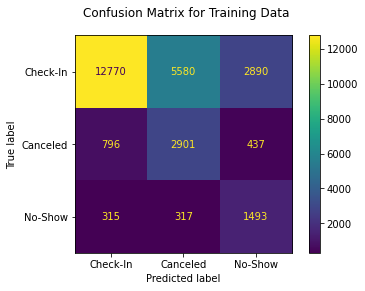

              precision    recall  f1-score   support

    Check-In       0.92      0.60      0.73     21240
    Canceled       0.33      0.70      0.45      4134
     No-Show       0.31      0.70      0.43      2125

    accuracy                           0.62     27499
   macro avg       0.52      0.67      0.54     27499
weighted avg       0.78      0.62      0.66     27499



In [21]:
Y_train_predict = Classifier.predict(X_train)

# print(Classifier.score(Y_train_predict, Y_train))
fig=plot_confusion_matrix(Classifier, X_train,Y_train,
display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_train, Y_train_predict, target_names=target_names))

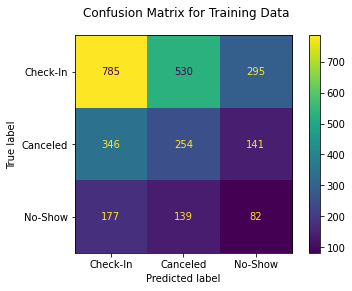

              precision    recall  f1-score   support

    Check-In       0.60      0.49      0.54      1610
    Canceled       0.28      0.34      0.31       741
     No-Show       0.16      0.21      0.18       398

    accuracy                           0.41      2749
   macro avg       0.34      0.35      0.34      2749
weighted avg       0.45      0.41      0.42      2749



In [22]:
X_val = Val_Data.loc[:,Categorical+Continus]
Y_val = Val_Data.loc[:,Label]

Y_val_predict = Classifier.predict(X_val)

# print(Classifier.score(Y_val_predict, Y_val))
fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_val, Y_val_predict, target_names=target_names))

In [ ]:
X_Test = Test_Data.loc[:,Categorical+Continus]
# Y_val = Test_Data.loc[:,Label]

Test_Data_predict = Classifier.predict(X_Test)

Test_Data["Reservation_Status"] = Test_Data_predict

# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(3,'No-Show')
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(2,"Canceled")
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(1,"Check-In")

Submission = Test_Data.loc[:,["Reservation-id","Reservation_Status"]]
Submission.to_csv("Submission Model-2 XGboost.csv",index=False)
Submission